In [61]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [62]:
random.seed(2427348)
np.random.seed(2427348)

In [63]:
T = 1024
stream = np.random.poisson(lam=1, size=T).tolist()

In [64]:
s = 32
sampling = []
t_values = []
lambda_hats = []

for i, x in enumerate(stream, start = 1):
    if i <= s:
        sampling.append(x)
    elif i > s:
        j = random.randint(1, i)
        if j <= s:
            sampling[j-1] = x
    if i % s == 0:
        t_values.append(i)
        lambda_hats.append(sum(sampling) / s)    

In [65]:
mean_hat = sum(lambda_hats) / len(lambda_hats)
var_hat = sum((h - mean_hat)**2 for h in lambda_hats) / len(lambda_hats)
std_hat = math.sqrt(var_hat)

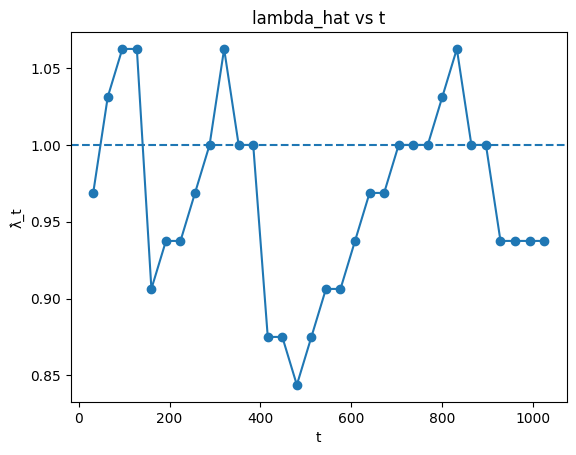

Mean: 0.967, Standard Deviation: 0.059


In [66]:
plt.plot(t_values, lambda_hats, marker='o', linestyle='-')
plt.axhline(1.0, linestyle='--')
plt.xlabel('t')
plt.ylabel('λ̂_t')
plt.title('lambda_hat vs t')
plt.show()
print(f"Mean: {mean_hat:.3f}, Standard Deviation: {std_hat:.3f}")